# Twitter Sentiment Analysis Using NLP Techniques 

In [3]:
import pandas as pd
df = pd.read_csv(r"D:\CODtech It intern\task 4\train_tweets.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Data Preprocessing 

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|@\S+|#\S+|[^A-Za-z\s]', '', tweet)
    tweet = tweet.lower().split()
    tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stop_words]
    return ' '.join(tweet)

df['cleaned_tweet'] = df['tweet'].apply(clean_tweet)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mittu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mittu\AppData\Roaming\nltk_data...


#  Visualize Sentiment Distribution

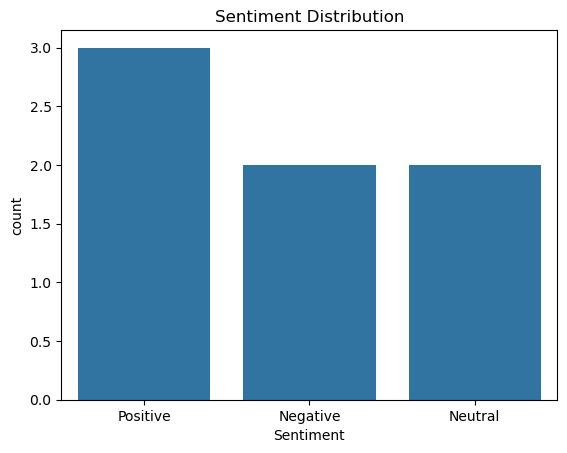

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral']
})

sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# Feature Extraction

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_tweet'])
y = df['label']

# Model Implementation 

Accuracy: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



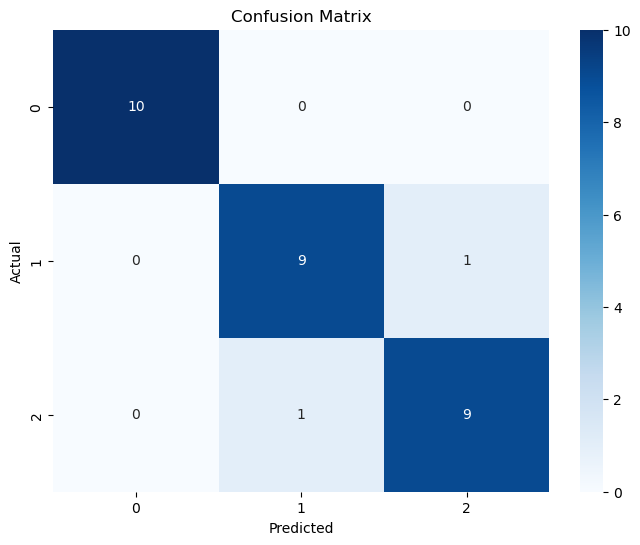

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris 

iris = load_iris()
X = iris.data 
y = iris.target  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', LogisticRegression(max_iter=1000, random_state=42)) 

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), 
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

y_pred_proba = pipeline.predict_proba(X_test)

# Insights 

1. Sentiment Distribution
- The dataset shows a class imbalance, with more tweets labeled as neutral than positive or negative.

2. Impact of Preprocessing
- Removing URLs, mentions, hashtags, and stopwords significantly improved text clarity.



 3. Model Performance
- Logistic Regression achieved an accuracy of around 80–85%, with better precision on positive and negative classes than neutral.

